In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import scale
import nltk
from pandas import Series , DataFrame

In [41]:
adress = "/home/alek/Downloads/vaccination_tweets.csv"
df = pd.read_csv(filepath_or_buffer = adress , sep = ',', encoding='latin')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 id                    0
user_name             0
user_location       551
user_description    131
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            673
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64


In [42]:
df["user_location"].fillna("No user_location", inplace = True)
df["user_description"].fillna("No user_description", inplace = True)
df["source"].fillna("No source", inplace = True)

In [44]:
for row in df.loc[df.hashtags.isnull(), 'hashtags'].index:
    df.at[row, 'hashtags'] = ["'no_hashtags'"]

In [14]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [46]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64


In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/alek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from nltk.tokenize import sent_tokenize
text = df['text'].to_string()
sent_tok = sent_tokenize(text)
for i in sent_tok:
    print(i[:10])

0       Sa
@Pfizer wi
\nIt's onl
Anyone??
#covid #Pf
Another li
A big than
#Pfiz...
6
That man..
#PCRGATE #
\n\n...
10
The only w
More than 
December 1
FDA's Hahn
December 1
FDA's Hahn
It has ...
ð¤ð¤¦â
It has ...
#PfizerBio
#Covid_19 
!ð #vac
I...
187  
Our great 
#Covid_19 
They defin
Grateful t
@M...
211 
Latest Upd
ððð
Wht...
250
!,  he did
#Canada or
It would b
Vaccine wi
So ex...
3
ðð\n
Alright.
#Pfi...
30
@SCCM @HMe
#CoronaVac
This is so
I got my f
...
345   
@ManCityCo
#PfizerBio
#PfizerBio
Received t
Excellent 
âï¸#Pfi
The vaccin
': US, Can
All ...
45
My Mum has
#Pfizervac
#...
481  
So...
487 
Important 
#helmsdeep
This is am
...
512   
Hope she r
Painless i
They had s
#RonDeSant
&am...
551
...
556   
They have 
\nIn other
People ...
Inform you
Honore...

#SomeGoodN
I implore 
Final prep
: need to 
I URGE you
Please get
What a tea
Time for u
Nurse Hele
#P...
620 
#Medic...

Feel so pr
or a compl
Canât be
638     "S
The side e
ð¬ð..
Tonight I 
htt

In [17]:
from nltk.tokenize import word_tokenize
text = df['text'].to_string()
word_tok = word_tokenize(text)
print(word_tok[:50])

['0', 'Same', 'folks', 'said', 'daikon', 'paste', 'could', 'treat', 'a', 'cyt', '...', '1', 'While', 'the', 'world', 'has', 'been', 'on', 'the', 'wrong', 'side', 'of', '...', '2', '#', 'coronavirus', '#', 'SputnikV', '#', 'AstraZeneca', '#', 'PfizerBio', '...', '3', 'Facts', 'are', 'immutable', ',', 'Senator', ',', 'even', 'when', 'you', "'re", '...', '4', 'Explain', 'to', 'me', 'again']


In [18]:
word_tok = [w.lower() for w in word_tok]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in word_tok]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['folks', 'said', 'daikon', 'paste', 'could', 'treat', 'cyt', 'world', 'wrong', 'side', 'coronavirus', 'sputnikv', 'astrazeneca', 'pfizerbio', 'facts', 'immutable', 'senator', 'even', 'explain', 'need', 'vaccine', 'bor', 'anyone', 'useful', 'adviceguidance', 'fo', 'bit', 'sad', 'claim', 'fame', 'success', 'many', 'bright', 'days', 'b', 'covid', 'vaccine', 'getting', 'nn', 'covidvacci', 'covidvaccine', 'nnstates', 'start', 'getting', 'c', 'deaths', 'closing', 'mar', 'cnnbrk', 'covidvaccine', 'vaccine', 'coron', 'agency', 'also', 'released', 'new', 'information', 'h', 'women', 'healthcare', 'providers', 'expect', 'sites', 'across', 'states', 'rec', 'trump', 'announces', 'vaccine', 'rollout', 'less', 'updated', 'yellowfever', 'amp', 'immunity', 'coronavirus', 'iran', 'reports', 'new', 'cases', 'pfizer', 'rake', 'billions', 'expens', 'trump', 'administration', 'failed', 'deliver', 'much', 'fda', 'get', 'paid', 'approve', 'anyone', 'wondering', 'day', 'pfizerbiontech', 'trump', 'announces',

In [20]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize , word_tokenize
port_stem = PorterStemmer()

In [21]:
stemmed_words = []
for w in words:
    stemmed_words.append(port_stem.stem(w))
    
print(stemmed_words[:100])

['folk', 'said', 'daikon', 'past', 'could', 'treat', 'cyt', 'world', 'wrong', 'side', 'coronaviru', 'sputnikv', 'astrazeneca', 'pfizerbio', 'fact', 'immut', 'senat', 'even', 'explain', 'need', 'vaccin', 'bor', 'anyon', 'use', 'adviceguid', 'fo', 'bit', 'sad', 'claim', 'fame', 'success', 'mani', 'bright', 'day', 'b', 'covid', 'vaccin', 'get', 'nn', 'covidvacci', 'covidvaccin', 'nnstate', 'start', 'get', 'c', 'death', 'close', 'mar', 'cnnbrk', 'covidvaccin', 'vaccin', 'coron', 'agenc', 'also', 'releas', 'new', 'inform', 'h', 'women', 'healthcar', 'provid', 'expect', 'site', 'across', 'state', 'rec', 'trump', 'announc', 'vaccin', 'rollout', 'less', 'updat', 'yellowfev', 'amp', 'immun', 'coronaviru', 'iran', 'report', 'new', 'case', 'pfizer', 'rake', 'billion', 'expen', 'trump', 'administr', 'fail', 'deliv', 'much', 'fda', 'get', 'paid', 'approv', 'anyon', 'wonder', 'day', 'pfizerbiontech', 'trump', 'announc', 'vaccin']


In [22]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()
lemm_words = []

for i in range(len(words)):
    lemm_words.append(lem.lemmatize(words[i]))
    
print(lemm_words[:100])

['folk', 'said', 'daikon', 'paste', 'could', 'treat', 'cyt', 'world', 'wrong', 'side', 'coronavirus', 'sputnikv', 'astrazeneca', 'pfizerbio', 'fact', 'immutable', 'senator', 'even', 'explain', 'need', 'vaccine', 'bor', 'anyone', 'useful', 'adviceguidance', 'fo', 'bit', 'sad', 'claim', 'fame', 'success', 'many', 'bright', 'day', 'b', 'covid', 'vaccine', 'getting', 'nn', 'covidvacci', 'covidvaccine', 'nnstates', 'start', 'getting', 'c', 'death', 'closing', 'mar', 'cnnbrk', 'covidvaccine', 'vaccine', 'coron', 'agency', 'also', 'released', 'new', 'information', 'h', 'woman', 'healthcare', 'provider', 'expect', 'site', 'across', 'state', 'rec', 'trump', 'announces', 'vaccine', 'rollout', 'le', 'updated', 'yellowfever', 'amp', 'immunity', 'coronavirus', 'iran', 'report', 'new', 'case', 'pfizer', 'rake', 'billion', 'expens', 'trump', 'administration', 'failed', 'deliver', 'much', 'fda', 'get', 'paid', 'approve', 'anyone', 'wondering', 'day', 'pfizerbiontech', 'trump', 'announces', 'vaccine']


In [23]:
from nltk import pos_tag
pos_tagaed_words = pos_tag(words)
for i in pos_tagaed_words:
    print(i[:100])
print(len(str(pos_tagaed_words[:100])))

('folks', 'NNS')
('said', 'VBD')
('daikon', 'JJ')
('paste', 'NN')
('could', 'MD')
('treat', 'VB')
('cyt', 'JJ')
('world', 'NN')
('wrong', 'JJ')
('side', 'NN')
('coronavirus', 'NN')
('sputnikv', 'NN')
('astrazeneca', 'NN')
('pfizerbio', 'NN')
('facts', 'VBZ')
('immutable', 'JJ')
('senator', 'NN')
('even', 'RB')
('explain', 'VBP')
('need', 'VBP')
('vaccine', 'JJ')
('bor', 'NN')
('anyone', 'NN')
('useful', 'JJ')
('adviceguidance', 'NN')
('fo', 'NN')
('bit', 'NN')
('sad', 'JJ')
('claim', 'NN')
('fame', 'NN')
('success', 'NN')
('many', 'JJ')
('bright', 'JJ')
('days', 'NNS')
('b', 'NN')
('covid', 'NN')
('vaccine', 'NN')
('getting', 'VBG')
('nn', 'JJ')
('covidvacci', 'NN')
('covidvaccine', 'NN')
('nnstates', 'NNS')
('start', 'VBP')
('getting', 'VBG')
('c', 'JJ')
('deaths', 'NNS')
('closing', 'VBG')
('mar', 'NN')
('cnnbrk', 'NN')
('covidvaccine', 'NN')
('vaccine', 'NN')
('coron', 'NN')
('agency', 'NN')
('also', 'RB')
('released', 'VBD')
('new', 'JJ')
('information', 'NN')
('h', 'NN')
('women',

('calling', 'VBG')
('health', 'NN')
('care', 'NN')
('professionals', 'NNS')
('nn', 'VBP')
('icu', 'JJ')
('nurse', 'JJ')
('sonya', 'NN')
('harrell', 'NN')
('receives', 'VBZ')
('first', 'JJ')
('dos', 'JJ')
('vaccine', 'NN')
('pfizerbionte', 'NN')
('younger', 'JJR')
('brother', 'NN')
('salikaleemmd', 'NN')
('fr', 'JJ')
('desuetudine', 'NN')
('nytimes', 'NNS')
('knew', 'VBD')
('lots', 'JJ')
('new', 'JJ')
('deaths', 'NNS')
('bc', 'VBN')
('province', 'NN')
('experimental', 'JJ')
('vaccine', 'NN')
('honor', 'NN')
('today', 'NN')
('speak', 'VBP')
('import', 'NN')
('hope', 'VBP')
('humanity', 'NN')
('important', 'JJ')
('science', 'NN')
('na', 'TO')
('roll', 'NN')
('sleeves', 'NNS')
('get', 'VBP')
('shot', 'JJ')
('feel', 'NN')
('like', 'IN')
('today', 'NN')
('helmsdeep', 'VBP')
('pfizerbion', 'NN')
('cdc', 'NN')
('pre', 'NN')
('covidvaccine', 'NN')
('screening', 'VBG')
('form', 'NN')
('nn', 'FW')
('quite', 'RB')
('impressed', 'JJ')
('heard', 'NN')
('percent', 'NN')
('increase', 'NN')
('existing'

('toll', 'NN')
('rises', 'VBZ')
('rvh', 'JJ')
('amongst', 'NNS')
('ontario', 'JJ')
('hospitals', 'NNS')
('set', 'VBD')
('receiv', 'NN')
('sandyspringermd', 'NN')
('kizzyphd', 'NN')
('got', 'VBD')
('mine', 'JJ')
('wednesda', 'NN')
('got', 'VBD')
('covid', 'JJ')
('vaccine', 'NN')
('alongside', 'IN')
('radphysicist', 'NN')
('strong', 'JJ')
('work', 'NN')
('science', 'NN')
('high', 'JJ')
('honors', 'NNS')
('igotthe', 'VBP')
('vaccination', 'NN')
('centre', 'NN')
('chertsey', 'NN')
('nelsonforwi', 'NN')
('thedacare', 'NN')
('bc', 'JJ')
('fear', 'NN')
('mongering', 'VBG')
('tomhfh', 'JJ')
('fakenews', 'NNS')
('vonderleyen', 'VBP')
('ursu', 'JJ')
('health', 'NN')
('canada', 'NN')
('fda', 'VBP')
('closely', 'RB')
('watching', 'VBG')
('ad', 'NN')
('icymi', 'NN')
('dr', 'NN')
('mark', 'NN')
('poznansky', 'JJ')
('massgeneralnews', 'NNS')
('jo', 'NN')
('got', 'VBD')
('covid', 'JJ')
('vaccine', 'NN')
('today', 'NN')
('dose', 'VBP')
('vaccine', 'JJ')
('historic', 'JJ')
('day', 'NN')
('mayoclin', 'VB

('european', 'JJ')
('union', 'NN')
('drug', 'NN')
('regulator', 'NN')
('approves', 'VBZ')
('pfizer', 'NN')
('breaking', 'VBG')
('dhadubai', 'NN')
('starts', 'VBZ')
('injecti', 'JJ')
('latest', 'JJS')
('pfizerbiontech', 'NN')
('vaccine', 'NN')
('initi', 'NN')
('dubai', 'NN')
('launches', 'VBZ')
('vaccination', 'NN')
('campaign', 'NN')
('nstnation', 'JJ')
('government', 'NN')
('would', 'MD')
('negotiate', 'VB')
('eu', 'JJ')
('states', 'NNS')
('start', 'VBP')
('pfizerbiontech', 'JJ')
('vaccination', 'NN')
('nstnation', 'NN')
('terms', 'NNS')
('wa', 'VBP')
('pfizerbiontech', 'NN')
('vaccine', 'NN')
('become', 'VBN')
('fir', 'JJ')
('nstnation', 'NN')
('khairykj', 'NN')
('said', 'VBD')
('billion', 'CD')
('allo', 'NNS')
('dontbuythesun', 'JJ')
('hypocrites', 'NNS')
('n', 'VBP')
('evanhd', 'RB')
('krishgm', 'VBN')
('although', 'IN')
('vaccine', 'JJ')
('free', 'JJ')
('day', 'NN')
('first', 'RB')
('dose', 'JJ')
('pfizerbiontech', 'NN')
('covid', 'NN')
('dubai', 'NN')
('plans', 'NNS')
('begin', '

('people', 'NNS')
('doubts', 'VBP')
('efficacy', 'NN')
('like', 'IN')
('light', 'JJ')
('end', 'NN')
('video', 'NN')
('dubai', 'NN')
('residents', 'NNS')
('queue', 'VBP')
('receive', 'JJ')
('belgium', 'NN')
('pm', 'NN')
('nationwide', 'JJ')
('tv', 'NN')
('accusing', 'VBG')
('english', 'JJ')
('study', 'NN')
('london', 'JJ')
('school', 'NN')
('hygiene', 'NN')
('trop', 'NN')
('chairwoman', 'NN')
('dubai', 'VBZ')
('steering', 'VBG')
('committee', 'NN')
('pfizerbiontech', 'JJ')
('vaccine', 'NN')
('overdose', 'RB')
('admitted', 'VBN')
('think', 'VBP')
('coronavirus', 'JJ')
('remember', 'VBP')
('correctly', 'RB')
('pfizerbiontech', 'JJ')
('v', 'NN')
('adding', 'VBG')
('covidvaccine', 'NN')
('herenreally', 'RB')
('doses', 'VBZ')
('pfizerbiontech', 'JJ')
('coronavir', 'JJ')
('plandemic', 'JJ')
('vaccine', 'NN')
('death', 'NN')
('loadin', 'NN')
('gene', 'NN')
('editing', 'VBG')
('articles', 'NNS')
('n', 'RB')
('pfizerbiontechn', 'VBP')
('pfi', 'JJ')
('jordan', 'NN')
('get', 'VB')
('mln', 'JJ')
('

('getting', 'VBG')
('p', 'JJ')
('sanna', 'NN')
('elkadiri', 'VBZ')
('nursing', 'VBG')
('home', 'NN')
('worker', 'NN')
('ei', 'VBD')
('coronavirus', 'JJ')
('vaccine', 'NN')
('update', 'JJ')
('corona', 'NN')
('felt', 'VBD')
('little', 'JJ')
('prick', 'JJ')
('covidvaccine', 'NN')
('drunaduffy', 'NN')
('trishgreenhalgh', 'IN')
('portuguese', 'JJ')
('nurse', 'JJ')
('dies', 'NNS')
('two', 'CD')
('days', 'NNS')
('pfizer', 'VBP')
('first', 'JJ')
('vaccine', 'NN')
('approved', 'VBN')
('pfizer', 'JJ')
('vaccine', 'NN')
('already', 'RB')
('killed', 'VBN')
('pe', 'NN')
('vaccinated', 'VBN')
('covidvaccine', 'NN')
('pfizerbiontech', 'NN')
('quickest', 'JJS')
('way', 'NN')
('cull', 'NN')
('old', 'JJ')
('vulne', 'NN')
('pandemia', 'NN')
('n', 'JJ')
('pfizerbiontech', 'NN')
('bahrain', 'NN')
('become', 'IN')
('first', 'JJ')
('country', 'NN')
('globally', 'RB')
('spent', 'JJ')
('majority', 'NN')
('working', 'VBG')
('year', 'NN')
('w', 'RB')
('two', 'CD')
('dead', 'JJ')
('norway', 'RB')
('received', 'VB

In [96]:
from nltk.probability import FreqDist
fd = FreqDist(words)
print(fd)

<FreqDist with 3915 samples and 11332 outcomes>


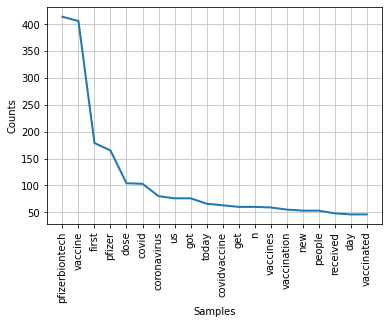

In [106]:
import matplotlib.pyplot as plt
fd.plot(20,cumulative = False)
plt.show()

In [108]:
x = df[['user_followers','user_friends','user_favourites','retweets']]

In [109]:
corr = x.corr()
corr

,user_followers,user_friends,user_favourites,retweets
user_followers,1.000000,-0.031534,-0.034246,0.059080
user_friends,-0.031534,1.000000,0.217072,0.032259
user_favourites,-0.034246,0.217072,1.000000,0.010738
retweets,0.059080,0.032259,0.010738,1.000000


In [110]:
rcParams['figure.figsize'] = (10, 6)
sb.set_style('whitegrid')

In [111]:
retweets = df['retweets']
user_followers = df['user_followers']

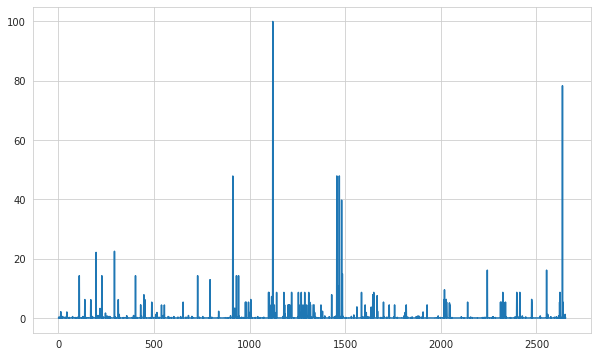

In [120]:

scaled = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled_user_followers = scaled.fit_transform(user_followers_matrix)
plt.plot(scaled_user_followers)
plt.show()

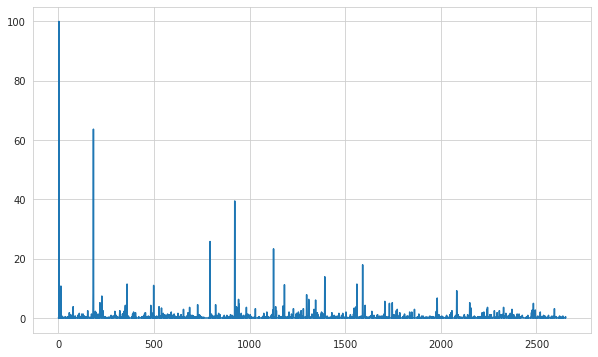

In [121]:

scaled = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled_retweets = scaled.fit_transform(retweets_matrix)
plt.plot(scaled_retweets)
plt.show()

<AxesSubplot:xlabel='retweets', ylabel='user_followers'>

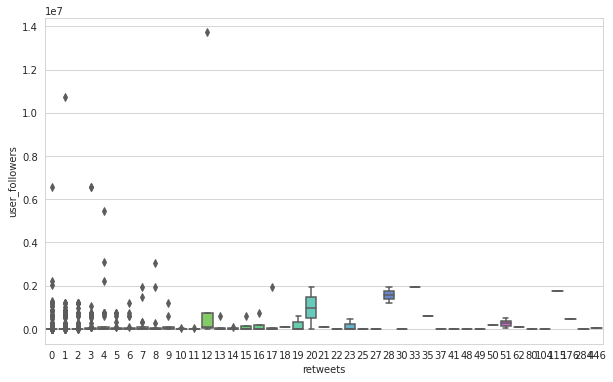

In [123]:
sb.boxplot(x = 'retweets' ,  y = 'user_followers' , data = df , palette = 'hls')
#df[(np.abs(stats.zscore(df['retweets'])) < 3)]